## 3.2　デュレーションとコンベクシティ

コード3.2 pyfin_bond_duration_convexity.py

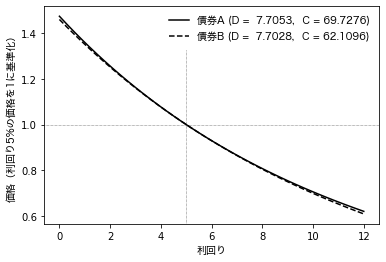

In [1]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 債券価格の計算
def Bond_Price(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券価格
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[0.0, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), CF)
#%% 債券デュレーションの計算
def Bond_Duration(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券デュレーション
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue]
    Coef = np.linspace(1, Maturity, Maturity) * CF
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) / Price
#%% 債券コンベクシティの計算
def Bond_Convexity(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券コンベクシティ
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Duration = Bond_Duration(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue]
    Coef = (np.linspace(1, Maturity, Maturity) - Duration)**2 * CF
    Dispersion = pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) \
                 / Price
    return (Dispersion + (1.0 + Duration) * Duration) / (1.0 + 0.01 * Yield)**2
#%% 債券のデュレーションとコンベクシティの計算
#   債券A: 残存期間10年，表面利率7%，額面100円
#   債券B: 残存期間8年，表面利率0.9%，額面100円
#   利回りは全て5%で統一
P_A = Bond_Price(5, 10, 7, 100)
P_B = Bond_Price(5, 8, 0.9, 100)
D_A = Bond_Duration(5, 10, 7, 100)
D_B = Bond_Duration(5, 8, 0.9, 100)
C_A = Bond_Convexity(5, 10, 7, 100)
C_B = Bond_Convexity(5, 8, 0.9, 100)
#%% 債券のデュレーションとコンベクシティの関係を示すグラフの作成
V_Yield = np.linspace(0, 12, 41)
V_Price_A = np.array([Bond_Price(Yield, 10, 7, 100) for Yield in V_Yield])
V_Price_B = np.array([Bond_Price(Yield, 8, 0.9, 100) for Yield in V_Yield])
fig1 = plt.figure(1, facecolor='w')
plt.plot(V_Yield, V_Price_A / P_A, 'k-')
plt.plot(V_Yield, V_Price_B / P_B, 'k--')
plt.axhline(1, color='k', linestyle=':', linewidth=0.5)
plt.axvline(5, ymin=0, ymax=0.8, color='k', linestyle=':', linewidth=0.5)
plt.xlabel(u'利回り', fontproperties=jpfont)
plt.ylabel(u'価格（利回り5%の価格を1に基準化）', fontproperties=jpfont)
Legend_A = u'債券A (D ={0:8.4f}，C ={1:8.4f})'.format(D_A, C_A)
Legend_B = u'債券B (D ={0:8.4f}，C ={1:8.4f})'.format(D_B, C_B)
plt.legend([Legend_A, Legend_B], loc='best', frameon=False, prop=jpfont)
plt.show()